# $12^{th}$ excercises - 12.1: Classification of images with a Convolutional neural network
## Notebook setup
#### Used libraries

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.optimizers import Adam

from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Functions

In [6]:
def create_model():   
    model = Sequential()
    model.add(Conv2D(num_classes, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(num_classes, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    return model

def compile_model(opt_function):
    # create the model
    model=create_model()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_function,
                  metrics=['acc'])
    return model

In [7]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

## The excercise 

In [11]:

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print()
print('X_test shape:', x_test.shape)
print('Y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [13]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
    
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
    
Y_train = keras.utils.to_categorical(y_train, num_classes) #inizialmente le label sono la cifra, lo voglio trasformare in vettore di bit di cui quello acceso è quello con indice la cifra (cioè quello che sarà output rete)
Y_test = keras.utils.to_categorical(y_test, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [15]:
model_CNN=compile_model(Adam())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 10)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 10)         

In [16]:
RERUN=True
epochs = 5

if(RERUN):
    batch_size = 32 
    history = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_test, Y_test))
    print("Storing model and history")
    path = "store/122-"
    path_history = path+"history.csv"
    path_model = path+"model.tf"
        
    model_CNN.save(filepath=path_model, include_optimizer=True)  
    df  = pd.DataFrame(history.history) 
    with open(path_history, mode='w') as file:
        df.to_csv(file)
    print()


Epoch 1/5


2022-06-25 16:47:55.634998: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 43s 22ms/step - loss: 0.4042 - acc: 0.8718 - val_loss: 0.0996 - val_acc: 0.9700
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1380 - acc: 0.9580 - val_loss: 0.0678 - val_acc: 0.9788
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1099 - acc: 0.9663 - val_loss: 0.0534 - val_acc: 0.9833
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0930 - acc: 0.9714 - val_loss: 0.0512 - val_acc: 0.9843
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0873 - acc: 0.9730 - val_loss: 0.0476 - val_acc: 0.9845
Storing model and history


INFO:tensorflow:Assets written to: store/122-model.tf/assets


INFO:tensorflow:Assets written to: store/122-model.tf/assets


313/313 [==============================] - 4s 11ms/step - loss: 0.0476 - acc: 0.9845


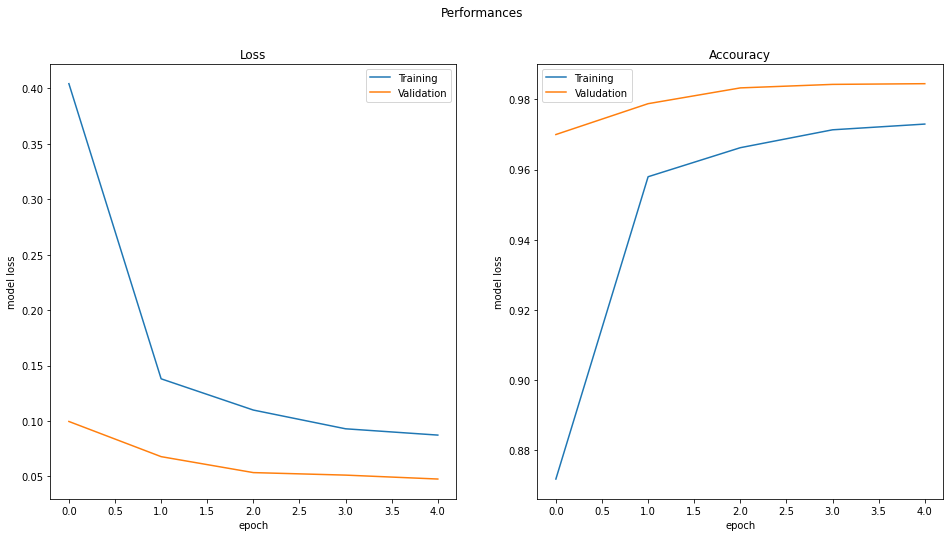

In [17]:


plt.figure(figsize=(16, 8))
plt.suptitle("Performances")

path = "store/122-"
model_CNN=load_model(path+"model.tf")
history = pd.read_csv(path+"history.csv")
    
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

plt.subplot(121)
plt.plot(range(0, epochs), history.loc[:,"loss"],label="Training")
plt.plot(range(0, epochs), history.loc[:,"val_loss"],label="Validation")
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Loss')
plt.legend()

plt.subplot(122)
plt.plot(range(0, epochs), history.loc[:,"acc"], label="Training")
plt.plot(range(0, epochs), history.loc[:,"val_acc"],label="Valudation")
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Accouracy')
plt.legend()

plt.show()


1/1 [==============================] - 0s 144ms/step
[[9.9563521e-01 3.8342636e-09 9.2328072e-04 1.5776026e-05 1.3458511e-08
  3.1863772e-05 4.9375609e-04 3.7845547e-07 2.7064682e-04 2.6290633e-03]]


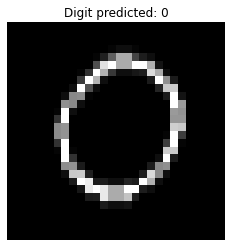

1/1 [==============================] - 0s 33ms/step
[[3.1060274e-05 9.8866498e-01 5.0943071e-04 1.0901289e-03 1.5792848e-03
  2.2641860e-04 7.4186360e-06 1.9556468e-03 2.3661905e-03 3.5694253e-03]]


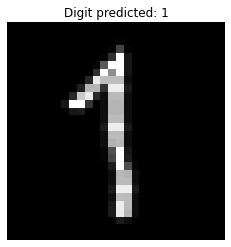

1/1 [==============================] - 0s 29ms/step
[[1.8245564e-05 3.3310041e-04 9.9931180e-01 1.7396986e-04 1.1034157e-06
  4.8203583e-06 3.2542178e-09 1.5297235e-04 3.5698067e-06 4.9185331e-07]]


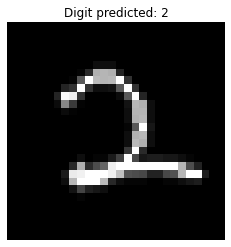

1/1 [==============================] - 0s 32ms/step
[[4.84680562e-09 2.82150637e-07 1.28595438e-03 9.98594463e-01
  1.36261695e-08 1.76882222e-05 2.05839013e-09 1.30389810e-09
  8.99498482e-05 1.15630301e-05]]


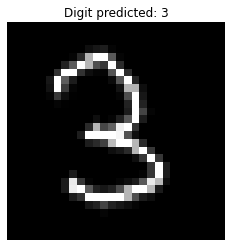

1/1 [==============================] - 0s 49ms/step
[[1.9754280e-07 2.5930940e-06 7.1179739e-04 2.8091401e-06 9.9668735e-01
  1.9276938e-05 4.5921697e-06 2.2228954e-03 3.1156713e-04 3.6891608e-05]]


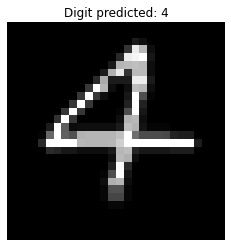

1/1 [==============================] - 0s 35ms/step
[[2.9490181e-07 4.2457207e-10 2.9240323e-07 3.5951348e-04 2.1863436e-10
  9.9924833e-01 4.6034395e-07 4.5433950e-07 1.5028901e-04 2.4030985e-04]]


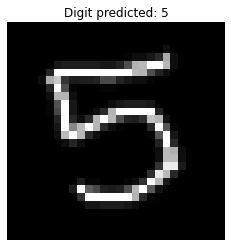

1/1 [==============================] - 0s 38ms/step
[[4.9579813e-04 1.7832083e-07 2.5237820e-04 2.7383275e-03 1.5251804e-05
  6.4738345e-01 2.2714934e-01 1.9984748e-08 1.1334383e-01 8.6214170e-03]]


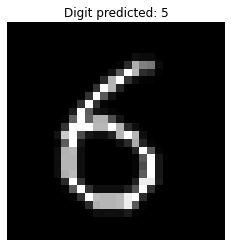

1/1 [==============================] - 0s 35ms/step
[[1.7223213e-06 5.1081413e-05 2.0224608e-02 4.2729001e-02 1.3238130e-06
  4.7034014e-06 3.3878195e-10 9.3580389e-01 3.7301902e-04 8.1056921e-04]]


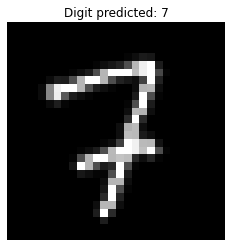

1/1 [==============================] - 0s 35ms/step
[[7.0138185e-06 2.6469100e-12 1.2100938e-05 2.1837659e-03 5.6716648e-10
  1.6119627e-03 1.0653087e-04 9.5546054e-12 9.9603564e-01 4.3017611e-05]]


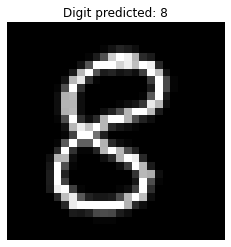

1/1 [==============================] - 0s 58ms/step
[[1.0172351e-06 1.1625374e-09 2.1204773e-05 4.1385129e-02 1.4721887e-05
  6.7540637e-04 1.3525539e-10 1.5379104e-05 4.0046759e-03 9.5388240e-01]]


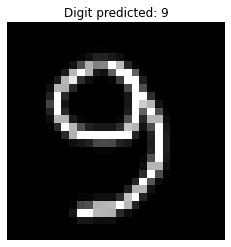

In [18]:

for digit in range(10):
    digit_in = Image.open(f"in/{digit}.png").convert('L')
    ydim, xdim = digit_in.size
  
    pix=digit_in.load();
    
    if keras.backend.image_data_format() == 'channels_first':
        img = np.zeros((1, ydim, xdim))
        for j in range(ydim):
            for i in range(xdim):
                img[0, i, j] = pix[j,i]
    else:
        img = np.zeros((ydim, xdim, 1))
        for j in range(ydim):
            for i in range(xdim):
                img[i, j, 0] = pix[j,i]
    img /= 255
    pred = model_CNN.predict(img[None])
    plt.imshow(img, cmap='gray')    
    plt.title(f"Digit predicted: {np.argmax(pred)}")
    plt.axis('off') 
    print(pred)
    plt.show()